# Recorded Demo of RecNextEval for SIGIR 2026 Presentation

Paper title: RecNextEval: A Reference Implementation for Temporal Next-Batch Recommendation Evaluation

Presenter: Ng Tze Kean

Presentation paramters:

- Dataset: MovieLens100K
- Top K = 10
- Algorithm: ItemKNNIncremental, RecentPopularity
- First timestamp split at epoch time 875_156_710

In [1]:
from datetime import datetime, timezone


epoch_ts = 875_156_710
converted_dt = datetime.fromtimestamp(epoch_ts, tz=timezone.utc)
converted_dt

datetime.datetime(1997, 9, 25, 3, 5, 10, tzinfo=datetime.timezone.utc)

In [2]:
from recnexteval.datasets import MovieLens100K
from recnexteval.settings import SlidingWindowSetting


k = 10
dataset = MovieLens100K()
data = dataset.load()

setting_window = SlidingWindowSetting(
    training_t=875_156_710,
    window_size=60 * 60 * 24 * 30,  # day times N
    top_K=k
)

setting_window.split(data)

INFO - recnexteval package loaded.
DEBUG - MovieLens100K being initialized with '/Users/ngtzekean/personal/RecNextEval/data/movielens' as the base path.
DEBUG - MovieLens100K is initialized.
INFO - MovieLens100K is loading dataset...
INFO - Loading from cache: /Users/ngtzekean/personal/RecNextEval/data/movielens/ml-100k_u.data.processed.parquet
DEBUG - MovieLens100K applying filters set.
DEBUG - 	interactions before preprocess: 100000
DEBUG - 	items before preprocess: 1682
DEBUG - 	users before preprocess: 943
DEBUG - 	interactions after preprocess: 100000
DEBUG - 	items after preprocess: 1682
DEBUG - 	users after preprocess: 943
INFO - MovieLens100K dataset loaded - Took 0.0416s
DEBUG - Splitting data...
DEBUG - Performing lt(t, 2147483647)
DEBUG - Performing lt(t, 875156710)
DEBUG - Performing ge(t, 875156710)
DEBUG - Performing lt(t, 3022640357)
DEBUG - TimestampSplitter(t=875156710,t_lower=None,t_upper=2147483647) has complete split


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG - NLastInteractionTimestampSplitter(t=875156710,t_lower=None,t_upper=2592000,n_seq_data=0,include_all_past_data=False) - Updating split point to t=875156710
DEBUG - Performing lt(t, 877748710)
DEBUG - Performing ge(t, 875156710)
DEBUG - NLastInteractionTimestampSplitter(t=875156710,t_lower=None,t_upper=2592000,n_seq_data=0,include_all_past_data=False) has complete split
INFO - Split at time 875156710 resulted in empty unlabelled testing samples.
DEBUG - NLastInteractionTimestampSplitter(t=875156710,t_lower=None,t_upper=2592000,n_seq_data=0,include_all_past_data=False) - Updating split point to t=877748710
DEBUG - Performing lt(t, 880340710)
DEBUG - Performing ge(t, 877748710)
DEBUG - NLastInteractionTimestampSplitter(t=877748710,t_lower=None,t_upper=2592000,n_seq_data=0,include_all_past_data=False) has complete split
INFO - Split at time 877748710 resulted in empty unlabelled testing samples.
DEBUG - NLastInteractionTimestampSplitter(t=877748710,t_lower=None,t_upper=2592000,n_seq

7it [00:00, 215.11it/s]              

INFO - Finished split with window size 2592000 seconds. Number of splits: 7 in total.
INFO - SlidingWindowSetting data split - Took 0.0457s
DEBUG - Checking split attribute and sizes.
DEBUG - Checking split attributes.
DEBUG - Split attributes are set.
DEBUG - Checking size of split sets.
WARNING - /Users/ngtzekean/personal/RecNextEval/src/recnexteval/settings/base.py:274: UserWarning: Background data resulting from SlidingWindowSetting is unusually small.
  warn(UserWarning(f"{name} resulting from {self.name} is unusually small."))

DEBUG - Size of split sets are checked.
INFO - SlidingWindowSetting data split complete.


In [3]:
from recnexteval.evaluators import EvaluatorStreamerBuilder


builder = EvaluatorStreamerBuilder(
    ignore_unknown_item=False,
    ignore_unknown_user=False,
)
builder.add_setting(setting=setting_window)
builder.set_metric_k(k)
builder.add_metric("HitK")
builder.add_metric("NDCGK")
evaluator = builder.build()

In [4]:
from recnexteval.algorithms import ItemKNNIncremental, RecentPopularity


external_model = [ItemKNNIncremental(K=k), RecentPopularity(K=k)]
ids = []
for model in external_model:
    ids.append(evaluator.register_model(algorithm=model))
print(ids)

INFO - Registered algorithm 'ItemKNNIncremental(K=10,pad_with_popularity=False)' with ID b5292667-7f03-5512-b48c-c04ab23e30f6
DEBUG - Algorithm b5292667-7f03-5512-b48c-c04ab23e30f6 registered
INFO - Registered algorithm 'RecentPopularity(K=10)' with ID 88e57fe3-7e9c-55bf-932d-1f3d4eff04a6
DEBUG - Algorithm 88e57fe3-7e9c-55bf-932d-1f3d4eff04a6 registered
[UUID('b5292667-7f03-5512-b48c-c04ab23e30f6'), UUID('88e57fe3-7e9c-55bf-932d-1f3d4eff04a6')]


In [5]:
evaluator.start_stream()

DEBUG - Restoring setting to iteration 0
DEBUG - Preparing evaluator for streaming
DEBUG - First step, getting training data
DEBUG - (user x item) shape defined is (np.int16(41), np.int16(872)). Shape of dataframe stored in matrix was (3446, 5) before masking
DEBUG - Final (user x item) shape defined is (np.int16(41), np.int16(872))
DEBUG - (user x item) shape defined is (np.int16(174), np.int16(1177)). Shape of dataframe stored in matrix was (1463, 5) before masking
DEBUG - Final (user x item) shape defined is (np.int16(174), np.int16(1177))
DEBUG - (user x item) shape defined is (np.int16(174), np.int16(1177)). Shape of dataframe stored in matrix was (1463, 5) before masking
DEBUG - Final (user x item) shape defined is (np.int16(174), np.int16(1177))
DEBUG - Algorithm 'ItemKNNIncremental(K=10,pad_with_popularity=False)' transitioned NEW -> READY
DEBUG - Algorithm 'RecentPopularity(K=10)' transitioned NEW -> READY
DEBUG - Evaluator is ready for streaming
INFO - Evaluator transitioned 

# Iteration 1

In [6]:
for model, model_id in zip(external_model, ids):
    training_data = evaluator.get_training_data(model_id)
    if training_data is None:
        raise ValueError("No data available for the external model.")
    model.fit(training_data)

DEBUG - Getting data for algorithm b5292667-7f03-5512-b48c-c04ab23e30f6
DEBUG - Algorithm 'ItemKNNIncremental(K=10,pad_with_popularity=False)' transitioned READY -> RUNNING
DEBUG - Fitting ItemKNNIncremental complete - Took 0.00978s
DEBUG - Getting data for algorithm 88e57fe3-7e9c-55bf-932d-1f3d4eff04a6
DEBUG - Algorithm 'RecentPopularity(K=10)' transitioned READY -> RUNNING
DEBUG - Fitting RecentPopularity complete - Took 0.000811s


In [7]:
for model, model_id in zip(external_model, ids):
    unlabeled_data = evaluator.get_unlabeled_data(model_id)
    prediction = model.predict(unlabeled_data)
    evaluator.submit_prediction(model_id, prediction)

DEBUG - Getting unlabeled data for algorithm b5292667-7f03-5512-b48c-c04ab23e30f6
DEBUG - Performing items_in comparison
DEBUG - Padding item ID in range(872, 1178) with empty fields
DEBUG - Padding by ItemKNNIncremental completed
DEBUG - Padding user ID in range(41, 175) with random items
DEBUG - Padding by ItemKNNIncremental completed
DEBUG - Submitting prediction for algorithm b5292667-7f03-5512-b48c-c04ab23e30f6
WARNING - Prediction matrix shape (1463, 1178) is different from ground truth matrix shape (1463, 1177).
DEBUG - HitK compute started - HitK_10
DEBUG - Number of users: 1463
DEBUG - Number of ground truth interactions: 1463
DEBUG - HitK compute complete - HitK_10
DEBUG - Metric HitK_10(timestamp_limit=875156710) created for algorithm ItemKNNIncremental(K=10,pad_with_popularity=False)_b5292667-7f03-5512-b48c-c04ab23e30f6
DEBUG - NDCGK compute started - NDCGK_10
DEBUG - Number of users: 1463
DEBUG - Number of ground truth interactions: 1463
DEBUG - NDCGK compute complete - ND

# Run till completion

In [8]:
for i in range(setting_window.num_split - 1):
    for model, model_id in zip(external_model, ids):
        training_data = evaluator.get_training_data(model_id)
        model.fit(training_data)
        unlabeled_data = evaluator.get_unlabeled_data(model_id)
        prediction = model.predict(unlabeled_data)
        evaluator.submit_prediction(model_id, prediction)

DEBUG - Getting data for algorithm b5292667-7f03-5512-b48c-c04ab23e30f6
DEBUG - Not first step, getting previous ground truth data as training data
DEBUG - (user x item) shape defined is (np.int16(174), np.int16(1192)). Shape of dataframe stored in matrix was (11661, 5) before masking
DEBUG - Final (user x item) shape defined is (np.int16(174), np.int16(1192))
DEBUG - (user x item) shape defined is (np.int16(391), np.int16(1388)). Shape of dataframe stored in matrix was (2534, 5) before masking
DEBUG - Final (user x item) shape defined is (np.int16(391), np.int16(1388))
DEBUG - (user x item) shape defined is (np.int16(391), np.int16(1388)). Shape of dataframe stored in matrix was (2534, 5) before masking
DEBUG - Final (user x item) shape defined is (np.int16(391), np.int16(1388))
DEBUG - Algorithm 'ItemKNNIncremental(K=10,pad_with_popularity=False)' transitioned PREDICTED -> READY
DEBUG - Algorithm 'RecentPopularity(K=10)' transitioned PREDICTED -> READY
DEBUG - Algorithm 'ItemKNNIncre

# evaluate metrics

In [9]:
evaluator.get_all_algorithm_status()

{'ItemKNNIncremental(K=10,pad_with_popularity=False)_b5292667-7f03-5512-b48c-c04ab23e30f6': <AlgorithmStateEnum.PREDICTED: 'PREDICTED'>,
 'RecentPopularity(K=10)_88e57fe3-7e9c-55bf-932d-1f3d4eff04a6': <AlgorithmStateEnum.PREDICTED: 'PREDICTED'>}

In [10]:
evaluator.metric_results("macro")

macro_score  \
algorithm                                          metric                  
ItemKNNIncremental(K=10,pad_with_popularity=Fal... HitK_10      0.366751   
                                                   NDCGK_10     0.166534   
RecentPopularity(K=10)_88e57fe3-7e9c-55bf-932d-... HitK_10      0.576868   
                                                   NDCGK_10     0.157799   

                                                             num_window  
algorithm                                          metric                
ItemKNNIncremental(K=10,pad_with_popularity=Fal... HitK_10            7  
                                                   NDCGK_10           7  
RecentPopularity(K=10)_88e57fe3-7e9c-55bf-932d-... HitK_10            7  
                                                   NDCGK_10           7

In [11]:
evaluator.metric_results("micro")


micro_score  \
algorithm                                          metric                 
ItemKNNIncremental(K=10,pad_with_popularity=Fal... HitK_10     0.172926   
                                                   NDCGK_10    0.205655   
RecentPopularity(K=10)_88e57fe3-7e9c-55bf-932d-... HitK_10     0.127239   
                                                   NDCGK_10    0.150742   

                                                             num_user  
algorithm                                          metric              
ItemKNNIncremental(K=10,pad_with_popularity=Fal... HitK_10       1428  
                                                   NDCGK_10      1428  
RecentPopularity(K=10)_88e57fe3-7e9c-55bf-932d-... HitK_10       1428  
                                                   NDCGK_10      1428

In [12]:
evaluator.metric_results("user")

user_id  \
algorithm                                          timestamp metric             
ItemKNNIncremental(K=10,pad_with_popularity=Fal... 875156710 HitK_10        0   
                                                             HitK_10        1   
                                                             HitK_10        2   
                                                             HitK_10        3   
                                                             HitK_10        4   
...                                                                       ...   
RecentPopularity(K=10)_88e57fe3-7e9c-55bf-932d-... 890708710 NDCGK_10     938   
                                                             NDCGK_10     939   
                                                             NDCGK_10     940   
                                                             NDCGK_10     941   
                                                             NDCGK_10     942   

                                                                      user_score  
algorithm                                          timestamp metric               
ItemKNNIncremental(K=10,pad_with_popularity=Fal... 875156710 HitK_10         0.5  
                                                             HitK_10         0.1  
                                                             HitK_10         0.2  
                                                             HitK_10         0.5  
                                                             HitK_10         0.4  
...                                                                          ...  
RecentPopularity(K=10)_88e57fe3-7e9c-55bf-932d-... 890708710 NDCGK_10   0.494508  
                                                             NDCGK_10   0.280974  
                                                             NDCGK_10    0.38997  
                                                             NDCGK_10   0.363881  
                                                             NDCGK_10   0.274127  

[5712 rows x 2 columns]

In [13]:
evaluator.metric_results("window")

window_score  \
algorithm                                          timestamp metric                   
ItemKNNIncremental(K=10,pad_with_popularity=Fal... 875156710 HitK_10       0.207547   
                                                             NDCGK_10      0.054930   
                                                   877748710 HitK_10       0.220974   
                                                             NDCGK_10      0.080724   
                                                   880340710 HitK_10       0.393443   
                                                             NDCGK_10      0.190783   
                                                   882932710 HitK_10       0.415888   
                                                             NDCGK_10      0.203331   
                                                   885524710 HitK_10       0.468927   
                                                             NDCGK_10      0.226851   
                                                   888116710 HitK_10       0.532609   
                                                             NDCGK_10      0.259807   
                                                   890708710 HitK_10       0.327869   
                                                             NDCGK_10      0.149314   
RecentPopularity(K=10)_88e57fe3-7e9c-55bf-932d-... 875156710 HitK_10       0.459119   
                                                             NDCGK_10      0.107547   
                                                   877748710 HitK_10       0.573034   
                                                             NDCGK_10      0.115145   
                                                   880340710 HitK_10       0.590164   
                                                             NDCGK_10      0.145244   
                                                   882932710 HitK_10       0.471963   
                                                             NDCGK_10      0.112848   
                                                   885524710 HitK_10       0.632768   
                                                             NDCGK_10      0.202847   
                                                   888116710 HitK_10       0.581522   
                                                             NDCGK_10      0.169378   
                                                   890708710 HitK_10       0.729508   
                                                             NDCGK_10      0.251582   

                                                                       num_user  
algorithm                                          timestamp metric              
ItemKNNIncremental(K=10,pad_with_popularity=Fal... 875156710 HitK_10       1463  
                                                             NDCGK_10      1463  
                                                   877748710 HitK_10       2534  
                                                             NDCGK_10      2534  
                                                   880340710 HitK_10       1607  
                                                             NDCGK_10      1607  
                                                   882932710 HitK_10       1889  
                                                             NDCGK_10      1889  
                                                   885524710 HitK_10       1453  
                                                             NDCGK_10      1453  
                                                   888116710 HitK_10       1496  
                                                             NDCGK_10      1496  
                                                   890708710 HitK_10       2120  
                                                             NDCGK_10      2120  
RecentPopularity(K=10)_88e57fe3-7e9c-55bf-932d-... 875156710 HitK_10       1463  
                                                             NDCGK

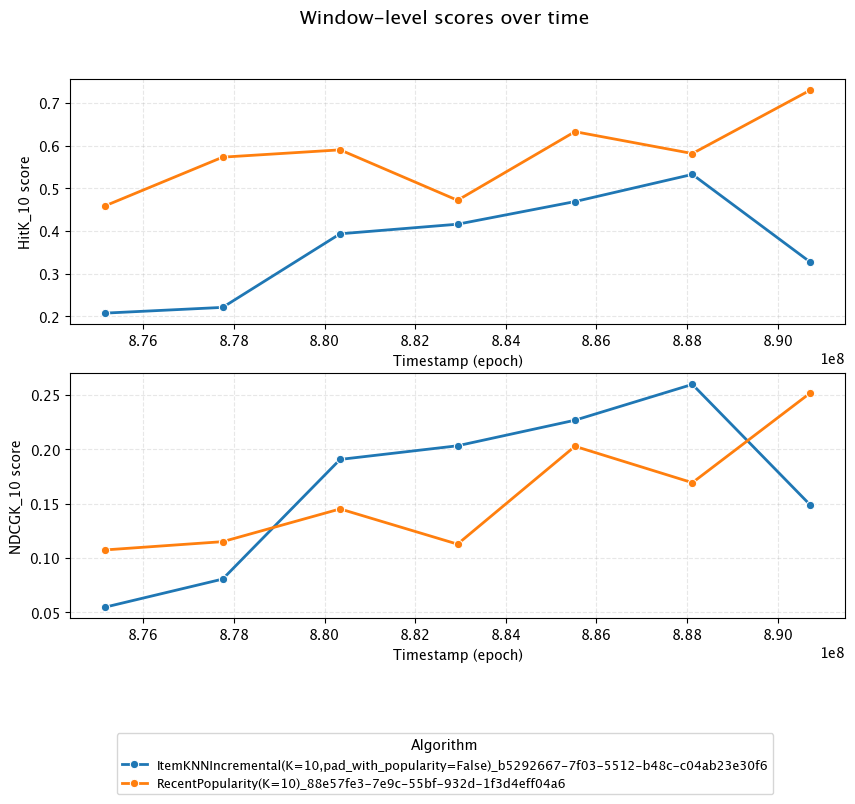

In [14]:
evaluator.plot_window_level_metric()